In [1]:
import numpy as np
from datetime import datetime
import pandas as pd

g10 = pd.read_csv('G10.csv',index_col=0)

In [2]:
g10

,EUR,JPY,GBP,CAD,AUD,NZD,CHF,DKK,NOK,SEK
Dates,,,,,,,,,,
03-01-11,1.3361,81.74,1.5489,0.9938,1.0168,0.7734,0.9334,5.5788,5.8277,6.7004
04-01-11,1.3308,82.04,1.5587,0.9983,1.0051,0.7666,0.9486,5.6006,5.8631,6.7233
05-01-11,1.3149,83.25,1.5515,0.9956,0.9995,0.7571,0.9659,5.6673,5.9028,6.7635
06-01-11,1.3003,83.33,1.5473,0.9966,0.9944,0.7566,0.9655,5.7300,5.9603,6.8640
07-01-11,1.2907,83.15,1.5548,0.9935,0.9959,0.7598,0.9673,5.7719,5.9910,6.9374
...,...,...,...,...,...,...,...,...,...,...
16-06-21,1.1995,110.71,1.3988,1.2277,0.7610,0.7051,0.9087,6.2000,8.4805,8.4588
17-06-21,1.1907,110.21,1.3922,1.2358,0.7552,0.7005,0.9175,6.2452,8.5491,8.5529
18-06-21,1.1864,110.21,1.3810,1.2465,0.7479,0.6936,0.9216,6.2676,8.6694,8.6115


In [3]:
y= g10["EUR"]
x= np.linspace(1 ,len(y),len(y))

In [6]:
#from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
from scipy import ndimage

x_sm = np.array(x)
y_sm = np.array(y)

# resample to lots more points - needed for the smoothed curves
x_smooth = np.linspace(x_sm.min(), x_sm.max(), 200)

# spline - always goes through all the data points x/y
#y_spline = interpolate.spline(x, y, x_smooth)

spl = interpolate.UnivariateSpline(x, y)
spl 

No handles with labels found to put in legend.


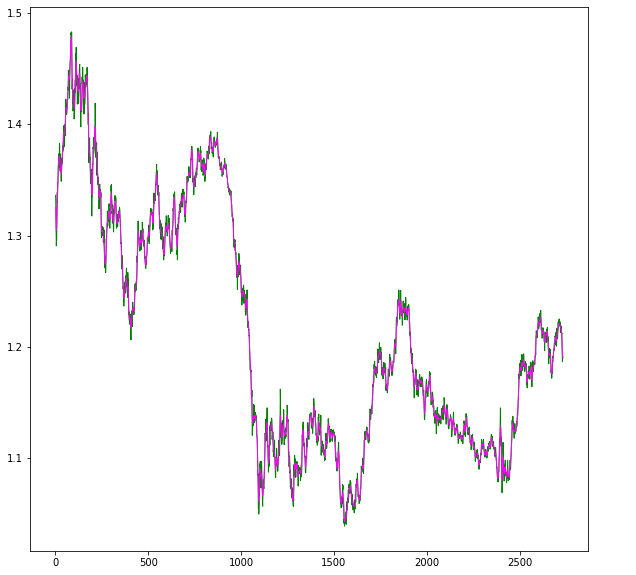

In [4]:
sigma = 2
x_g1d = ndimage.gaussian_filter1d(x_sm, sigma)
y_g1d = ndimage.gaussian_filter1d(y_sm, sigma)
fig, ax = plt.subplots(figsize=(10, 10))
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), frameon=False)
plt.plot(x_sm, y_sm, 'green', linewidth=1)
#plt.plot(x_smooth, y_spline, 'red', linewidth=1)
#plt.plot(x_smooth, spl(x_smooth), 'yellow', linewidth=1)
plt.plot(x_g1d,y_g1d, 'magenta', linewidth=1)

plt.show()